In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [2]:
import ct_projector.prior.numpy as recon_prior

In [3]:
# load a sample CT image
filename = './3.nii.gz'
ct = sitk.ReadImage(filename)
spacing = ct.GetSpacing()
img = sitk.GetArrayFromImage(ct)

# convert image from HU to attenuation coefficient
# This is the approximate relationship
img = (img.astype(np.float32) + 1024) / 1000 * 0.019
img[img < 0] = 0

# also convert to image to our projector dimension batch, z, y, x
img = img[np.newaxis,...]
img = img[:, ::-1, ...]
spacing = np.array(spacing[::-1])

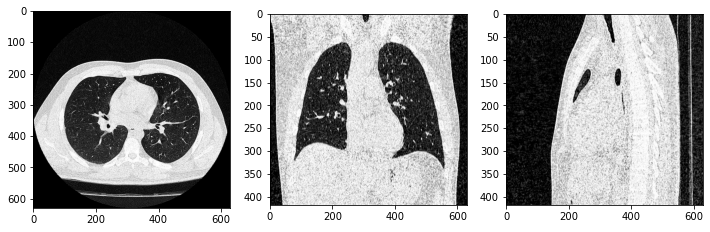

In [4]:
# show the ct images
plt.figure(figsize = (12,4))
plt.subplot(131); plt.imshow(img[0, img.shape[1]//2, ...], 'gray', aspect=spacing[1] / spacing[2])
plt.subplot(132); plt.imshow(img[0, :, img.shape[2]//2, :], 'gray', aspect=spacing[0] / spacing[2])
plt.subplot(133); plt.imshow(img[0, ..., img.shape[3]//2], 'gray', aspect=spacing[0] / spacing[1])

In [5]:
dimg = recon_prior.nlm(img, img, 1, [5,5,5], [3,3,3], 1)

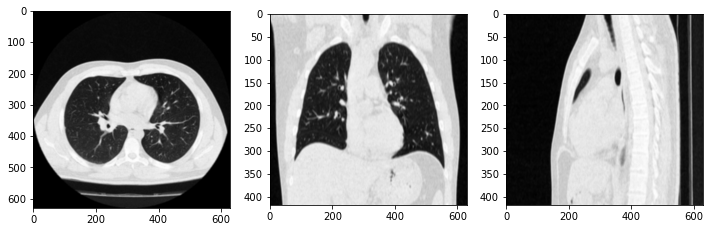

In [6]:
plt.figure(figsize = (12,4))
plt.subplot(131); plt.imshow(dimg[0, dimg.shape[1]//2, ...], 'gray', aspect=spacing[1] / spacing[2])
plt.subplot(132); plt.imshow(dimg[0, :, dimg.shape[2]//2, :], 'gray', aspect=spacing[0] / spacing[2])
plt.subplot(133); plt.imshow(dimg[0, ..., dimg.shape[3]//2], 'gray', aspect=spacing[0] / spacing[1])